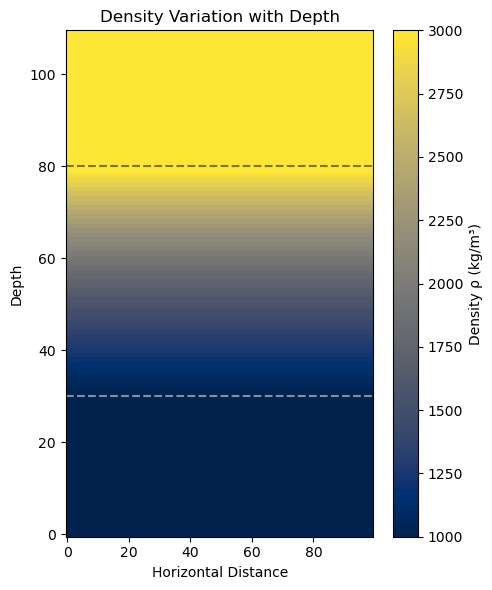

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
rho1 = 1000        # lower layer density (kg/m^3)
rho2 = 3000        # upper layer density (kg/m^3)
beta = np.log(rho2 / rho1)  # ensures smooth transition from rho1 to rho2
transition_thickness = 50   # number of points in transition layer

# Heights
h1 = 30  # thickness of rho1 layer
h3 = 30  # thickness of rho2 layer

# Transition layer from rho1 to rho2
l = np.linspace(0, 1, transition_thickness)
rho_transition = rho1 * np.exp(beta * l)

# Construct full profile
rho_profile = np.concatenate([
    rho1 * np.ones(h1),
    rho_transition,
    rho2 * np.ones(h3)
])

# Create 2D heatmap data
width = 100
heatmap = np.tile(rho_profile[:, np.newaxis], (1, width))

# Plotting
plt.figure(figsize=(5, 6))
plt.imshow(heatmap, cmap='cividis', origin='lower', aspect='auto')
plt.colorbar(label='Density ρ (kg/m³)')
plt.title('Density Variation with Depth')
plt.xlabel('Horizontal Distance')
plt.ylabel('Depth')

# Add subtle boundary lines
plt.axhline(y=h1, color='white', linestyle='--', linewidth = 1.5, alpha=0.5)
plt.axhline(y=h1 + transition_thickness, color='black', linestyle='--', linewidth=1.5, alpha=0.5)

plt.tight_layout()
plt.show()


# Discrete case 

In [34]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Densities
# rho1 = 1000  # Starting density (bottom)
# rho2 = 3000  # Ending density (top)
# beta = np.log(rho2 / rho1)  # For exponential transition

# # Dimensions
# height = 100
# width = 100

# # Depth vector and exponential density profile
# l = np.linspace(0, 1, height)  # normalized depth
# # rho_profile = rho1 * np.exp(beta * l)  # smooth exponential increase

# # Create 2D heatmap
# # heatmap = np.tile(rho_profile[:, np.newaxis], (1, width))

# # Plotting
# plt.figure(figsize=(5, 6))
# plt.imshow(heatmap, cmap='cividis', origin='lower', aspect='auto')
# plt.colorbar(label='Density ρ (kg/m³)')
# plt.title('Smooth Density Transition')
# plt.xlabel('Horizontal Distance')
# plt.ylabel('Depth')

# # Add subtle midline to mark the boundary visually
# midpoint = height // 2
# plt.axhline(y=midpoint, color='white', linestyle='--', linewidth=2, alpha=0.5)

# plt.tight_layout()
# plt.show()


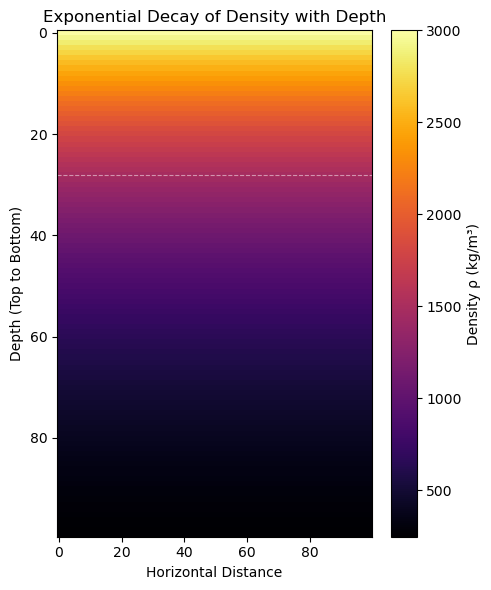

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rho0 = 3000       # Surface density (top)
beta = 2.5        # Decay rate (higher = faster decay)
height = 100      # Depth levels
width = 100       # Horizontal extent

# Normalized depth from top (0) to bottom (1)
z = np.linspace(0, 1, height)
rho_profile = rho0 * np.exp(-beta * z)  # Exponential decay with depth

# Create 2D heatmap
heatmap = np.tile(rho_profile[:, np.newaxis], (1, width))

# Plotting
plt.figure(figsize=(5, 6))
plt.imshow(heatmap, cmap='inferno', origin='upper', aspect='auto')
plt.colorbar(label='Density ρ (kg/m³)')
plt.title('Exponential Decay of Density with Depth')
plt.xlabel('Horizontal Distance')
plt.ylabel('Depth (Top to Bottom)')

# Optional: mark a characteristic decay depth (e.g., where density is half)
half_depth = np.where(rho_profile <= rho0 / 2)[0][0]
plt.axhline(y=half_depth, color='white', linestyle='--', linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.show()


## Vector field creation 

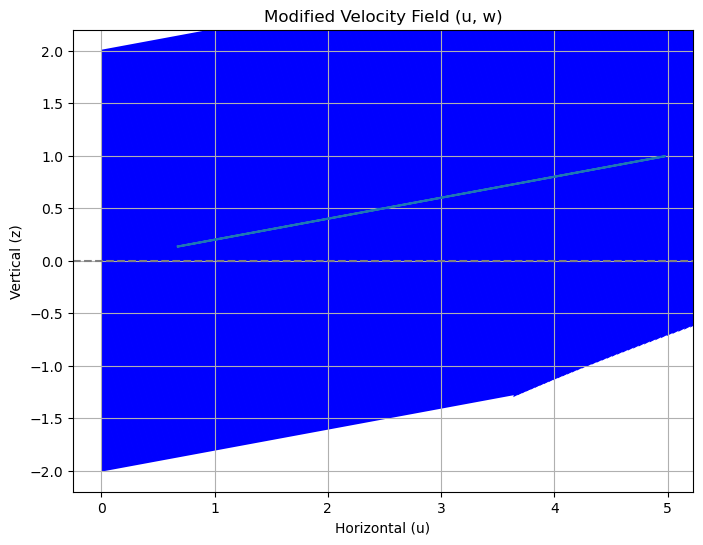

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Adjusted Parameters
B = 1.0              # Amplitude constant
kappa = 1          # Vertical wave number (reduced for smoother vertical decay)
kappa_prime = 1.0    # Horizontal wave number component for u to be non-zero
n = 1.0              # Frequency
sigma = 5.0          # Density
k = 10.0              # Wave number in x

# Define z-domain
z = np.linspace(-2, 2, 400)

# Define w(z) piecewise
w = np.where(z > 0, B * np.exp(-kappa * z), B * np.exp(kappa * z))

# Compute dw/dz
dw_dz = np.where(z > 0, -B * kappa * np.exp(-kappa * z), B * kappa * np.exp(kappa * z))

# Solve for delta p using equation (7)
delta_p = (n * sigma * dw_dz) / (1j * (kappa**2 + kappa_prime**2))

# Solve for u using third equation
u = -k * delta_p / (sigma * n)

# Plot vector field
plt.figure(figsize=(8, 6))
plt.quiver(np.zeros_like(z), z, np.abs(u), w, angles = 'xy', scale = 1, color = 'blue')
plt.plot(np.abs(u),w)
plt.xlabel('Horizontal (u)')
plt.ylabel('Vertical (z)')
plt.title('Modified Velocity Field (u, w)')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')
plt.show()


In [12]:
np.abs(u)

array([0.14715178, 0.14789123, 0.1486344 , 0.14938131, 0.15013196,
       0.1508864 , 0.15164462, 0.15240665, 0.15317251, 0.15394222,
       0.1547158 , 0.15549326, 0.15627463, 0.15705993, 0.15784917,
       0.15864238, 0.15943958, 0.16024078, 0.16104601, 0.16185529,
       0.16266863, 0.16348606, 0.16430759, 0.16513326, 0.16596307,
       0.16679705, 0.16763523, 0.16847762, 0.16932423, 0.17017511,
       0.17103026, 0.1718897 , 0.17275347, 0.17362158, 0.17449404,
       0.1753709 , 0.17625216, 0.17713784, 0.17802798, 0.17892259,
       0.1798217 , 0.18072532, 0.18163349, 0.18254622, 0.18346353,
       0.18438546, 0.18531202, 0.18624323, 0.18717913, 0.18811972,
       0.18906505, 0.19001512, 0.19096997, 0.19192961, 0.19289408,
       0.1938634 , 0.19483758, 0.19581666, 0.19680067, 0.19778961,
       0.19878353, 0.19978244, 0.20078637, 0.20179534, 0.20280939,
       0.20382853, 0.20485279, 0.2058822 , 0.20691678, 0.20795656,
       0.20900157, 0.21005182, 0.21110736, 0.2121682 , 0.21323

In [3]:
u

array([ 0.+0.13533528j,  0.+0.13669885j,  0.+0.13807616j,  0.+0.13946734j,
        0.+0.14087254j,  0.+0.1422919j ,  0.+0.14372556j,  0.+0.14517367j,
        0.+0.14663636j,  0.+0.14811379j,  0.+0.14960611j,  0.+0.15111346j,
        0.+0.152636j  ,  0.+0.15417389j,  0.+0.15572726j,  0.+0.15729629j,
        0.+0.15888113j,  0.+0.16048193j,  0.+0.16209886j,  0.+0.16373209j,
        0.+0.16538177j,  0.+0.16704807j,  0.+0.16873116j,  0.+0.1704312j ,
        0.+0.17214838j,  0.+0.17388286j,  0.+0.17563481j,  0.+0.17740442j,
        0.+0.17919185j,  0.+0.1809973j ,  0.+0.18282093j,  0.+0.18466294j,
        0.+0.18652351j,  0.+0.18840282j,  0.+0.19030107j,  0.+0.19221845j,
        0.+0.19415514j,  0.+0.19611135j,  0.+0.19808726j,  0.+0.20008309j,
        0.+0.20209902j,  0.+0.20413527j,  0.+0.20619203j,  0.+0.20826951j,
        0.+0.21036793j,  0.+0.21248749j,  0.+0.2146284j ,  0.+0.21679088j,
        0.+0.21897516j,  0.+0.22118144j,  0.+0.22340995j,  0.+0.22566091j,
        0.+0.22793455j,  

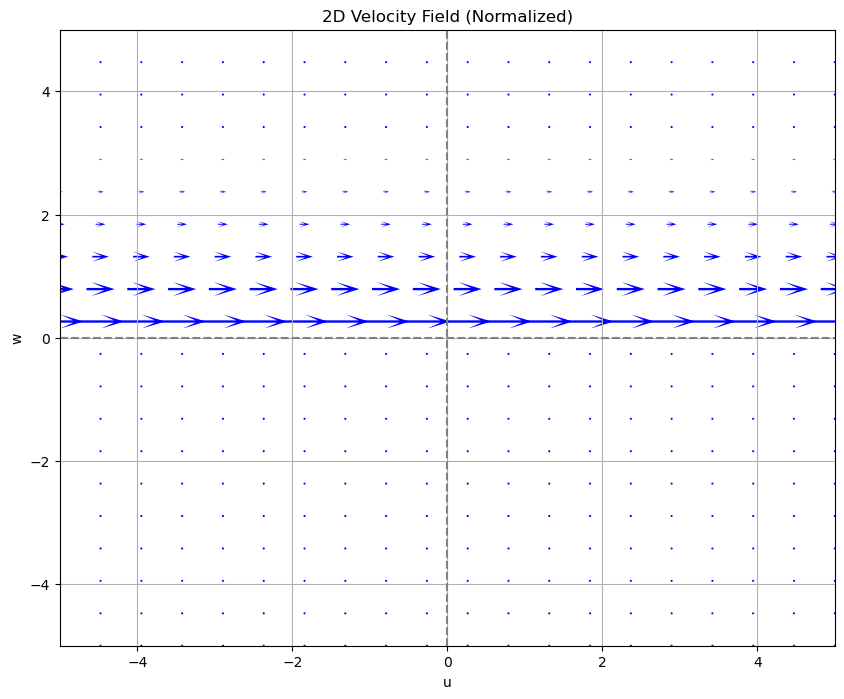

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
B = 1.0
kappa = 1.0
kappa_prime = 0
n = 1.0
sigma = 10.0
# k = 10.0

# Create a 2D grid for plotting
x = np.linspace(-5, 5, 20)
z = np.linspace(-5, 5, 20)
X, Z = np.meshgrid(x, z)

# Define w(z): vertical velocity component (exponential decay in z)
w = B * np.exp(-kappa * np.abs(Z))

# dw/dz: derivative with respect to z (piecewise)
dw_dz = -np.sign(Z) * B * kappa * np.exp(-kappa * np.abs(Z))

# Pressure perturbation delta_p (complex)
delta_p = (n * sigma * dw_dz) / (1j * (kappa**2 + kappa_prime**2))

# Horizontal velocity component u (from pressure gradient)
u = -kappa * delta_p / (sigma * n)

# Plot vector field
plt.figure(figsize=(10, 8))
plt.quiver(X, Z, w, u, color='blue', scale=25, pivot='mid',
           alpha=1, linewidth=5, headwidth=6, headlength=10)

# Customize plot
plt.title("2D Velocity Field (Normalized)")
plt.xlabel("u")
plt.ylabel("w")
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(-5, 5)
plt.ylim(-5, 5)

plt.show()


# Plotting with color gradient

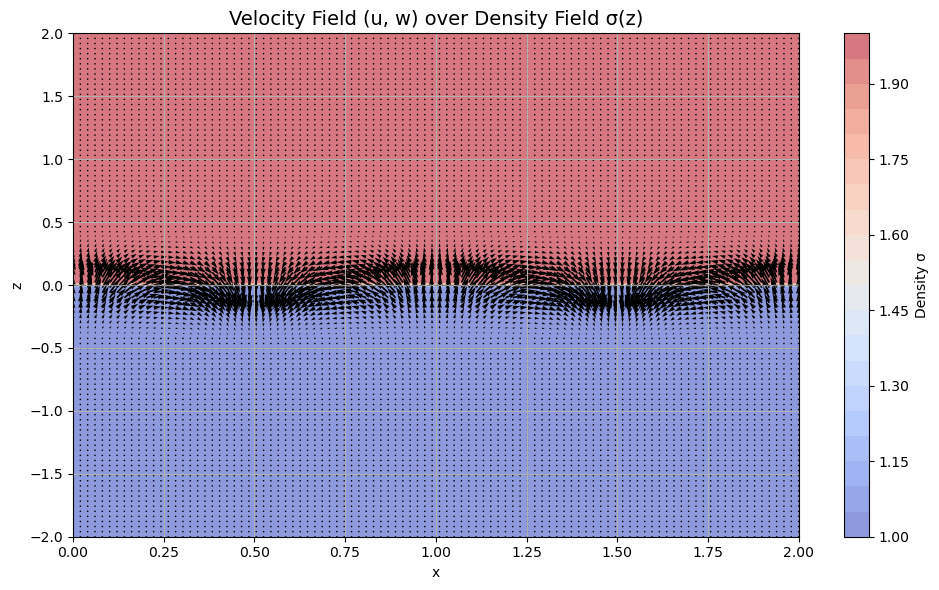

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Physical constants
g = 9.81
A = 1.0          # Amplitude
k = 2 * np.pi    # Wavenumber (1 wavelength unit)
x_vals = np.linspace(0, 2, 100)
z_vals = np.linspace(-2, 2, 100)
X, Z = np.meshgrid(x_vals, z_vals)

# Densities
sigma1 = 1.0     # Upper fluid (z > 0)
sigma2 = 2.0     # Lower fluid (z <= 0)
sigma = np.where(Z < 0, sigma1, sigma2)

# Frequency from dispersion relation
n = np.sqrt(g * k * (sigma2 - sigma1) / (sigma1 + sigma2))

# Time snapshot
t = 0

# Exponential decay factor
decay = np.exp(-k * np.abs(Z))

# w and u as real parts of complex expressions
kxnt = k * X + n * t
w = A * decay * np.cos(kxnt)
u = A * decay * np.sin(kxnt)  # π/2 phase lag = sin instead of cos

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Velocity Field (u, w) over Density Field σ(z)", fontsize=14)

# Background density field
plt.contourf(X, Z, sigma, levels=20, cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Density σ')

# Quiver plot
plt.quiver(X, Z, u, w, color='black', scale=30)

# Interface line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.xlabel('x')
plt.ylabel('z')
plt.grid(True)
plt.tight_layout()
plt.show()


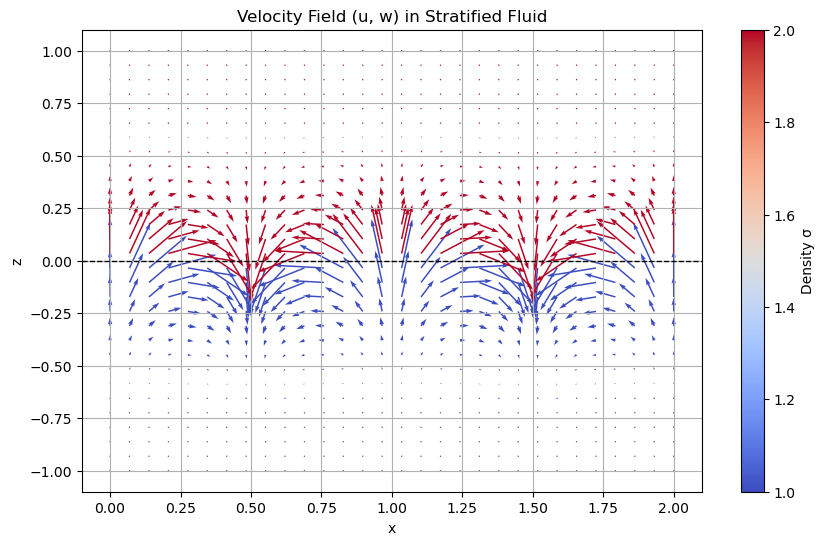

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 1.0               # amplitude
k = 2 * np.pi / 1.0   # wave number (λ = 1)
g = 9.81              # gravity
sigma1 = 2.0          # density above
sigma2 = 1.0          # density below
t = 0.0               # snapshot in time

# Frequency from dispersion relation
n = np.sqrt(g * k * (sigma1 - sigma2) / (sigma1 + sigma2))

# Define spatial grid
x = np.linspace(0, 2, 30)
z = np.linspace(-1, 1, 30)
X, Z = np.meshgrid(x, z)

# Density field (step at z = 0)
sigma = np.where(Z >= 0, sigma1, sigma2)

# Exponential decay with depth
decay = np.exp(-k * np.abs(Z))

# Phase
phase = k * X + n * t

# Velocity components
w = A * decay * np.cos(phase)
u = A * decay * np.sin(phase)  # phase shifted by -π/2

# Plot
plt.figure(figsize=(10, 6))
plt.quiver(X, Z, u, w, sigma, scale=10, cmap='coolwarm')
plt.colorbar(label='Density σ')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('Velocity Field (u, w) in Stratified Fluid')
plt.xlabel('x')
plt.ylabel('z')
plt.grid(True)
plt.show()


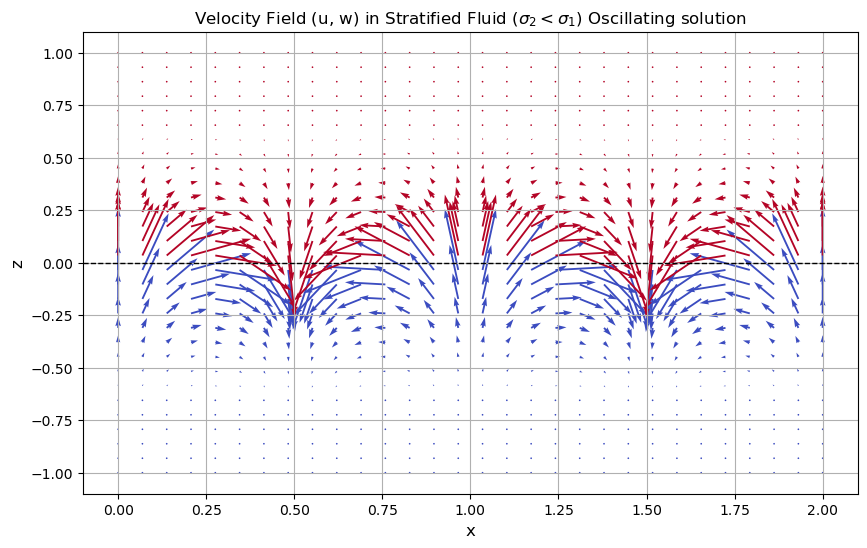

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
A = 1.0               # amplitude
k = 2 * np.pi / 1.0   # wave number (λ = 1)
g = 9.81              # gravity
sigma1 = 2.0          # density above
sigma2 = 1.0          # density below

# Frequency from dispersion relation
n = np.sqrt(g * k * (sigma1 - sigma2) / (sigma1 + sigma2))

# Spatial grid
x = np.linspace(0, 2, 30)
z = np.linspace(-1, 1, 30)
X, Z = np.meshgrid(x, z)

# Density field (step at z = 0)
sigma = np.where(Z >= 0, sigma1, sigma2)

# Exponential decay with depth
decay = np.exp(-k * np.abs(Z))

# Time parameters
frames = 60
T = 2 * np.pi / n  # full period of oscillation
t_vals = np.linspace(0, T, frames)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Background density shading (light, fixed)
# density_bg = ax.pcolormesh(X, Z, sigma, cmap='coolwarm', shading='auto', alpha=0.15)

# Initial velocity field
phase = k * X + n * t_vals[0]
w_init = A * decay * np.cos(phase)
u_init = A * decay * np.sin(phase)

# Quiver plot using sigma as color
quiver = ax.quiver(X, Z, u_init, w_init, sigma, scale=10, cmap='coolwarm')

# Add colorbar
# cbar = fig.colorbar(quiver, ax=ax)
# cbar.set_label('Density σ')

# Other plot elements
ax.axhline(0, color='k', linestyle='--', linewidth=1)
ax.set_title(r'Velocity Field (u, w) in Stratified Fluid ($\sigma_2 < \sigma_1$) Oscillating solution')
ax.set_xlabel('x',size = 12)
ax.set_ylabel('z',size = 12)
ax.grid(True)

# Update function for animation
def update(t):
    phase = k * X + n * t
    w = A * decay * np.cos(phase)
    u = A * decay * np.sin(phase)
    quiver.set_UVC(u, w)
    return quiver,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=t_vals, blit=True)

# Save to GIF
# ani.save('upperless.gif', writer='pillow', fps=15)


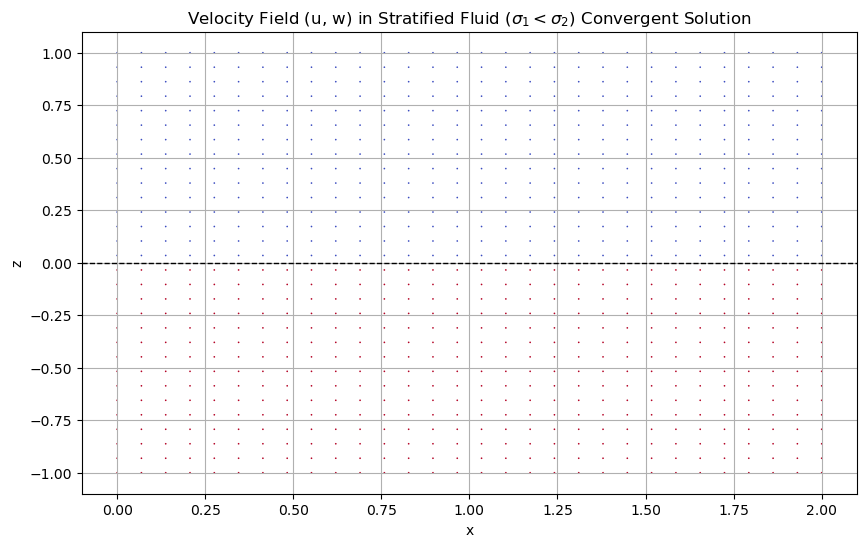

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
A = 1.0               # amplitude
k = 2 * np.pi / 1.0   # wave number (λ = 1)
g = 9.81              # gravity
sigma1 = 1.0          # density above
sigma2 = 2.0          # density below

# Frequency from dispersion relation
n = (1j)*np.sqrt(np.abs(g * k * (sigma1 - sigma2) / (sigma1 + sigma2)))

# Spatial grid
x = np.linspace(0, 2, 30)
z = np.linspace(-1, 1, 30)
X, Z = np.meshgrid(x, z)

# Density field (step at z = 0)
sigma = np.where(Z >= 0, sigma1, sigma2)

# Exponential decay with depth
decay = np.exp(-k * np.abs(Z))

# Time parameters
frames = 60
T = 2 * np.pi / n  # full period of oscillation
t_vals = np.linspace(0, T, frames)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Background density shading (light, fixed)
# density_bg = ax.pcolormesh(X, Z, sigma, cmap='coolwarm', shading='auto', alpha=0.15)

# Initial velocity field
phase = k * X 
w_init = A * decay * np.cos(phase)
u_init = A * decay * np.sin(phase)

# Quiver plot using sigma as color
quiver = ax.quiver(X, Z, u_init, w_init, sigma, scale=10, cmap='coolwarm')

# Add colorbar
# cbar = fig.colorbar(quiver, ax=ax)
# cbar.set_label('Density σ')

# Other plot elements
ax.axhline(0, color='k', linestyle='--', linewidth=1)
ax.set_title(r'Velocity Field (u, w) in Stratified Fluid ($\sigma_1 < \sigma_2$) Convergent Solution')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.grid(True)

# Update function for animation
def update(t):
    phase = k * X 
    w = A * decay * np.cos(phase) * np.exp(-n*t)
    u = A * decay * np.sin(phase) * np.exp(-n*t)
    quiver.set_UVC(u, w)
    return quiver,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=t_vals, blit=True)

# Save to GIF
ani.save('upper_greater_converge.gif', writer='pillow', fps=15)


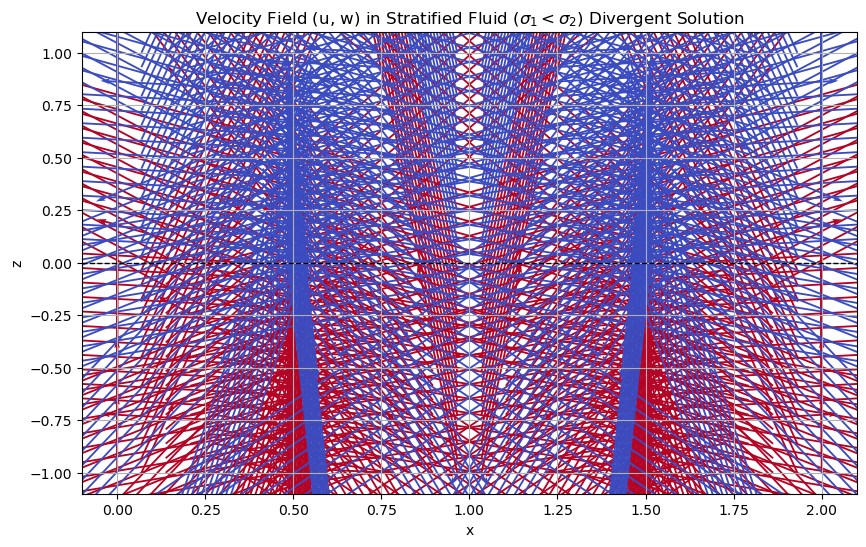

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
A = 1.0               # amplitude
k = 2 * np.pi / 1.0   # wave number (λ = 1)
g = 9.81              # gravity
sigma1 = 1.0          # density above
sigma2 = 2.0          # density below

# Frequency from dispersion relation
n = (1j)*np.sqrt(np.abs(g * k * (sigma1 - sigma2) / (sigma1 + sigma2)))

# Spatial grid
x = np.linspace(0, 2, 30)
z = np.linspace(-1, 1, 30)
X, Z = np.meshgrid(x, z)

# Density field (step at z = 0)
sigma = np.where(Z >= 0, sigma1, sigma2)

# Exponential decay with depth
decay = np.exp(-k * np.abs(Z))

# Time parameters
frames = 60
T = 2 * np.pi / n  # full period of oscillation
t_vals = np.linspace(0, T, frames)

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Background density shading (light, fixed)
# density_bg = ax.pcolormesh(X, Z, sigma, cmap='coolwarm', shading='auto', alpha=0.15)

# Initial velocity field
phase = k * X 
w_init = A * decay * np.cos(phase)
u_init = A * decay * np.sin(phase)

# Quiver plot using sigma as color
quiver = ax.quiver(X, Z, u_init, w_init, sigma, scale=10, cmap='coolwarm')

# Add colorbar
# cbar = fig.colorbar(quiver, ax=ax)
# cbar.set_label('Density σ')

# Other plot elements
ax.axhline(0, color='k', linestyle='--', linewidth=1)
ax.set_title(r'Velocity Field (u, w) in Stratified Fluid ($\sigma_1 < \sigma_2$) Divergent Solution')
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.grid(True)

# Update function for animation
def update(t):
    phase = k * X 
    w = A * decay * np.cos(phase) * np.exp(n*t)
    u = A * decay * np.sin(phase) * np.exp(n*t)
    quiver.set_UVC(u, w)
    return quiver,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=t_vals, blit=True)

# Save to GIF
ani.save('upper_greater_diverge.gif', writer='pillow', fps=10)


## 2nd case : exponential density profile

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# import imageio.v2 as imageio
# import os

# # Create a temporary directory to store frames
# frame_dir = "gif_frames"
# os.makedirs(frame_dir, exist_ok=True)

# # Parameters
# A = 1.0
# Ap = 1.0
# B = -0.5
# k = 2 * np.pi / 1.0
# a = 1
# l = 10
# x0 = 0
# y0 = 0
# lambda_x = 1.0
# lambda_y = 1.0
# p0 = 1.0
# beta = 1.0
# g = 9.81

# # Derived frequency n from theoretical relation
# numerator = g * beta * (k**2 * l**2)
# denominator = 0.25 * beta**2 * l**2 + k**2 * l**2 + (a**2 * np.pi**2)
# n = np.sqrt(np.abs(numerator / denominator))

# t0 = 0

# x = np.linspace(-2, 2, 40)
# z = np.linspace(0, 10, 40)
# X, Z = np.meshgrid(x, z)

# # Density field
# density = p0 * np.exp(B * Z)

# # Fixed spatial terms
# # phase = 2 * np.pi * (X ) / lambda_x
# exp_decay_w = np.exp(-0.5 * B * Z) * np.sin(a * np.pi * Z / l)
# exp_decay_uz = np.exp(-0.5 * B * Z) * (np.sin(a * np.pi * Z / l) * (-0.5 * beta) + (a*np.pi/l)*np.cos(a * np.pi * Z / l))

# # Time parameters
# T = 2 * np.pi / n
# t_snapshots = np.linspace(0, T, 30)

# filenames = []
# for i, t in enumerate(t_snapshots):
#     w = A * exp_decay_w *  np.cos(k*X) * np.cos(n * (t))
#     u = A * exp_decay_uz * np.sin(k * X) * np.cos(n*t)
    
#     fig, ax = plt.subplots(figsize=(6, 4))
#     q = ax.quiver(X, Z, u, w, density, cmap='plasma', scale=10)
#     ax.set_title(f"t = {t:.2f} s")
#     ax.set_xlabel("x")
#     ax.set_ylabel("z")
#     ax.grid(True)
#     ax.set_aspect('auto')


# # Create GIF
# with imageio.get_writer("exponential_case_stable.gif", mode='I', duration=0.2) as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)



GIF saved as 'exponential_case_stable.gif'


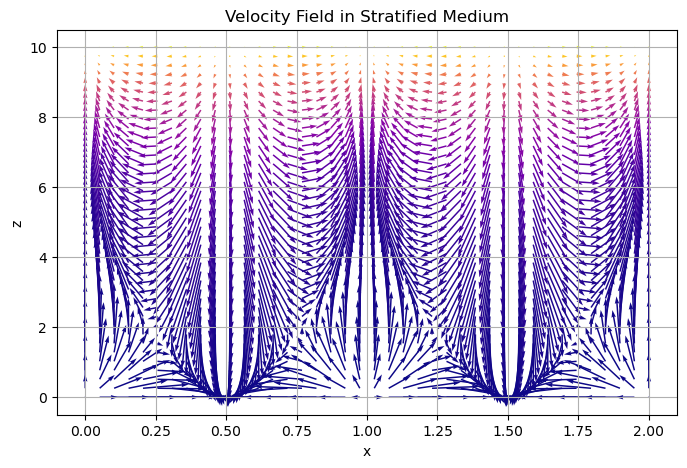

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
A = 3.0
B = 0.5
k = 2 * np.pi / 1.0
a = 1
l = 10
x0 = 0
y0 = 0
lambda_x = 1.0
lambda_y = 1.0
p0 = 1.0
beta = 1.0
g = 9.81

# Derived frequency n from theoretical relation
numerator = g * beta * (k**2 * l**2)
denominator = 0.25 * beta**2 * l**2 + k**2 * l**2 + (a**2 * np.pi**2)
n = np.sqrt(np.abs(numerator / denominator))

# Spatial grid
x = np.linspace(0, 2, 40)
z = np.linspace(0, 10, 40)
X, Z = np.meshgrid(x, z)

# Density field

# Fixed spatial terms
exp_decay_w = np.exp(-0.5 * B * Z) * np.sin(a * np.pi * Z / l)
exp_decay_uz = np.exp(-0.5 * B * Z) * (
    np.sin(a * np.pi * Z / l) * (-0.5 * beta) +
    (a * np.pi / l) * np.cos(a * np.pi * Z / l)
)

density = p0 * np.exp(B * Z) *(1 - ((exp_decay_w * beta) /n )* np.sin (k*X) )

# Initial velocity field for quiver
w_init = A * exp_decay_w * np.cos(k * X)
u_init = A * exp_decay_uz * np.sin(k * X)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 5))
quiver = ax.quiver(X, Z, u_init, w_init, density, cmap='plasma', scale=10)
ax.set_title("Velocity Field in Stratified Medium")
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.grid(True)
ax.set_aspect('auto')

# Time setup for animation
frames = 60
T = 2 * np.pi / n
t_vals = np.linspace(0, T, frames)

# Animation update function
def update(t):
    w = A * exp_decay_w * np.cos(k * X) * np.cos(n * t)
    u = A * exp_decay_uz * np.sin(k * X) * np.cos(n * t)
    quiver.set_UVC(u, w)
    return quiver,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=t_vals, blit=True)

# Save the animation to a GIF
ani.save("exponential_case_stable_final.gif", writer="pillow", fps=10)

print("GIF saved as 'exponential_case_stable.gif'")


## With varying density in time : stable solution

GIF saved as 'expcase_varying_density_smooth_stable2.gif'


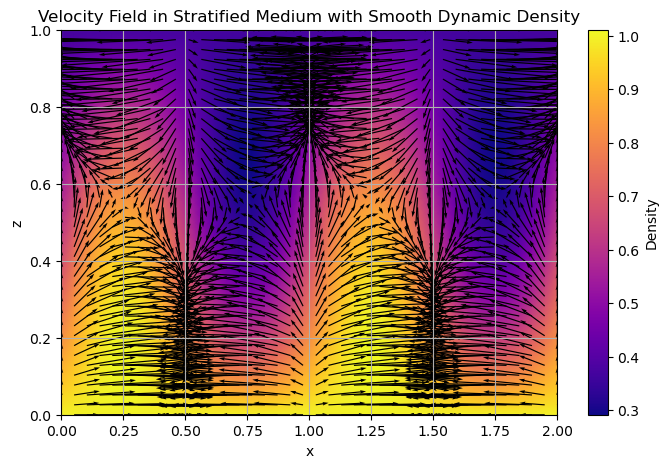

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
A = 0.5
k = 2 * np.pi / 1.0
a = 1
l = 1
p0 = 1.0
beta = -1.0
g = 9.81

# Derived frequency n from theoretical relation
numerator = g * beta * (k**2 * l**2)
denominator = 0.25 * beta**2 * l**2 + k**2 * l**2 + (a**2 * np.pi**2)
n = np.sqrt(np.abs(numerator / denominator))

# Higher-resolution spatial grid
x = np.linspace(0, 2, 40)
z = np.linspace(0, 1, 40)
X, Z = np.meshgrid(x, z)

# Fixed spatial terms
exp_decay_w = np.exp(-0.5 * beta * Z) * np.sin(a * np.pi * Z / l)
exp_decay_uz = np.exp(-0.5 * beta * Z) * (
    np.sin(a * np.pi * Z / l) * (-0.5 * beta) +
    (a * np.pi / l) * np.cos(a * np.pi * Z / l)
)

# Initial velocity and density field
w_init = A * exp_decay_w * np.cos(k * X)
u_init = A * exp_decay_uz * np.sin(k * X)
density_init = p0 * np.exp(beta * Z) * (1 - ((exp_decay_w * beta) / n) * np.sin(k * X))

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Use 'gouraud' shading for smoother appearance
density_bg = ax.pcolormesh(X, Z, density_init, cmap='plasma', shading='gouraud')

# Add colorbar for density
cbar = fig.colorbar(density_bg, ax=ax, label='Density')

# Quiver field
quiver = ax.quiver(X, Z, u_init, w_init, scale=20, color='black')

# Formatting
ax.set_title("Velocity Field in Stratified Medium with Smooth Dynamic Density")
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.grid(True)
ax.set_aspect('auto')

# Time setup for animation
frames = 60
T = 2 * np.pi / n
t_vals = np.linspace(0, T, frames)

# Update function
def update(t):
    w = A * exp_decay_w * np.cos(k * X) * np.cos(n * t)
    u = A * exp_decay_uz * np.sin(k * X) * np.cos(n * t)
    density = p0 * np.exp(beta * Z) * (1 - ((exp_decay_w * beta) / n) * np.sin(k * X) * np.cos(n * t))

    quiver.set_UVC(u, w)
    density_bg.set_array(density.ravel())
    return quiver, density_bg

# Create animation
ani = animation.FuncAnimation(fig, update, frames=t_vals, blit=True)

# Save animation to GIF
ani.save("expcase_varying_density_smooth_stable2.gif", writer="pillow", fps=10)

print("GIF saved as 'expcase_varying_density_smooth_stable2.gif'")


## Diverging solution with exponential density

GIF saved as 'expcase_diverging.gif'


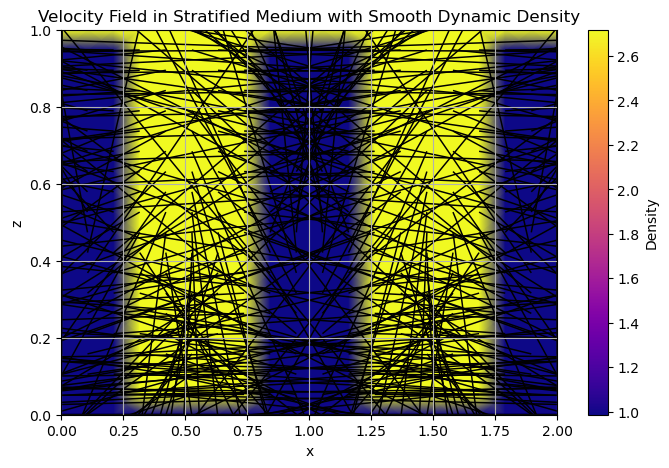

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
A = 0.5
k = 2 * np.pi / 1.0
a = 1
l = 1
p0 = 1.0
beta = 1.0
g = 9.81

# Derived frequency n from theoretical relation
numerator = g * beta * (k**2 * l**2)
denominator = 0.25 * beta**2 * l**2 + k**2 * l**2 + (a**2 * np.pi**2)
n = np.sqrt(np.abs(numerator / denominator))

# Higher-resolution spatial grid
x = np.linspace(0, 2, 20)
z = np.linspace(0, 1, 20)
X, Z = np.meshgrid(x, z)

# Fixed spatial terms
exp_decay_w = np.exp(-0.5 * beta * Z) * np.sin(a * np.pi * Z / l)
exp_decay_uz = np.exp(-0.5 * beta * Z) * (
    np.sin(a * np.pi * Z / l) * (-0.5 * beta) +
    (a * np.pi / l) * np.cos(a * np.pi * Z / l)
)

# Initial velocity and density field
w_init = A * exp_decay_w * np.cos(k * X)
u_init = A * exp_decay_uz * np.sin(k * X)
density_init = p0 * np.exp(beta * Z) * (1 - ((exp_decay_w * beta) / n) * np.cos(k * X))

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Use 'gouraud' shading for smoother appearance
density_bg = ax.pcolormesh(X, Z, density_init, cmap='plasma', shading='gouraud')

# Add colorbar for density
cbar = fig.colorbar(density_bg, ax=ax, label='Density')

# Quiver field
quiver = ax.quiver(X, Z, u_init, w_init, scale=20, color='black')

# Formatting
ax.set_title("Velocity Field in Stratified Medium with Smooth Dynamic Density")
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.grid(True)
ax.set_aspect('auto')

# Time setup for animation
frames = 60
T = 2 * np.pi / n
t_vals = np.linspace(0, T, frames)

# Update function
def update(t):
    w = A * exp_decay_w * np.cos(k * X) * np.exp(n*t)
    u = A * exp_decay_uz * np.sin(k * X) * np.exp(n*t)
    density = p0 * np.exp(beta * Z) * (1 - ((exp_decay_w * beta) / n) * np.cos(k * X) * np.exp(n*t))

    quiver.set_UVC(u, w)
    density_bg.set_array(density.ravel())
    return quiver, density_bg

# Create animation
ani = animation.FuncAnimation(fig, update, frames=t_vals, blit=True)

# Save animation to GIF
ani.save("expcase_diverging2.gif", writer="pillow", fps=10)

print("GIF saved as 'expcase_diverging.gif'")


## Converging solution - exponential density profile


GIF saved as 'expcase_diverging.gif'


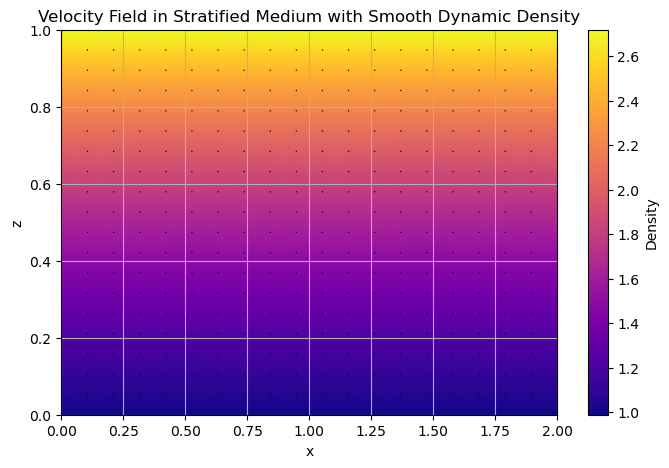

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
A = 0.5
k = 2 * np.pi / 1.0
a = 1
l = 1
p0 = 1.0
beta = 1.0
g = 9.81

# Derived frequency n from theoretical relation
numerator = g * beta * (k**2 * l**2)
denominator = 0.25 * beta**2 * l**2 + k**2 * l**2 + (a**2 * np.pi**2)
n = np.sqrt(np.abs(numerator / denominator))

# Higher-resolution spatial grid
x = np.linspace(0, 2, 20)
z = np.linspace(0, 1, 20)
X, Z = np.meshgrid(x, z)

# Fixed spatial terms
exp_decay_w = np.exp(-0.5 * beta * Z) * np.sin(a * np.pi * Z / l)
exp_decay_uz = np.exp(-0.5 * beta * Z) * (
    np.sin(a * np.pi * Z / l) * (-0.5 * beta) +
    (a * np.pi / l) * np.cos(a * np.pi * Z / l)
)

# Initial velocity and density field
w_init = A * exp_decay_w * np.cos(k * X)
u_init = A * exp_decay_uz * np.sin(k * X)
density_init = p0 * np.exp(beta * Z) * (1 + ((exp_decay_w * beta) / n) * np.cos(k * X))

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Use 'gouraud' shading for smoother appearance
density_bg = ax.pcolormesh(X, Z, density_init, cmap='plasma', shading='gouraud')

# Add colorbar for density
cbar = fig.colorbar(density_bg, ax=ax, label='Density')

# Quiver field
quiver = ax.quiver(X, Z, u_init, w_init, scale=20, color='black')

# Formatting
ax.set_title("Velocity Field in Stratified Medium with Smooth Dynamic Density")
ax.set_xlabel("x")
ax.set_ylabel("z")
ax.grid(True)
ax.set_aspect('auto')

# Time setup for animation
frames = 60
T = 2 * np.pi / n
t_vals = np.linspace(0, T, frames)

# Update function
def update(t):
    w = A * exp_decay_w * np.cos(k * X) * np.exp(-n*t)
    u = A * exp_decay_uz * np.sin(k * X) * np.exp(-n*t)
    density = p0 * np.exp(beta * Z) * (1 + ((exp_decay_w * beta) / n) * np.cos(k * X) * np.exp(-n*t))

    quiver.set_UVC(u, w)
    density_bg.set_array(density.ravel())
    return quiver, density_bg

# Create animation
ani = animation.FuncAnimation(fig, update, frames=t_vals, blit=True)

# Save animation to GIF
ani.save("Exponential_converging.gif", writer="pillow", fps=10)

print("GIF saved as 'expcase_diverging.gif'")


# 3rd case : Transcendental equation solution 